In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
import pickle
import os
import glob
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [ ]:
metrics.f1_score(average='weighted')

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [23]:
i = 1
frames = []
for name in os.listdir('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'):
    extents = os.path.splitext('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'+'/{}'.format(name))[1].lower()
    if extents == '.csv':
        df= pd.read_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        frames.append(df)
        # print('csv',df.shape)
    elif extents == '.xlsx':
        df= pd.read_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        df.columns = df.columns.astype(str)
        frames.append(df)
        # print('xlx',df.shape)


result =  pd.concat(frames, axis=0, ignore_index= True)

In [24]:
result.shape

(6024, 1060)

In [25]:
result.rename(columns = {' ': 'Output'}, inplace=True)

In [199]:
result_ =result.loc[:,'Output']
result__= result.iloc[:,15:-2]
result1 = result.iloc[:,1:14]

In [148]:
df = pd.concat([result__, result_], axis=1)
df.shape

(6024, 1044)

In [202]:
df_properties = pd.concat([result1, result_], axis=1)

In [203]:
df_with_calb = df[df['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]
df_without_calb = df[~df['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]

In [204]:
df_with_calb_prop = df_properties[df_properties['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]
df_without_calb_prop = df_properties[~df_properties['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]

In [151]:
df_without_calb.shape[0], df_with_calb.shape[0]

(4075, 1949)

In [205]:
df_without_calb_prop['w/f'] = df_without_calb_prop['Output'].str.split('_').str[0]
df_without_calb_prop['quality'] = df_without_calb_prop['Output'].str.split('_').str[3]
df_without_calb_prop['color'] = df_without_calb_prop['Output'].str.split('_').str[2]


In [152]:
df_without_calb['w/f'] = df_without_calb['Output'].str.split('_').str[0]
df_without_calb['quality'] = df_without_calb['Output'].str.split('_').str[3]
df_without_calb['color'] = df_without_calb['Output'].str.split('_').str[2]


In [206]:
df_without_calb_W_prop = df_without_calb_prop[df_without_calb_prop['w/f'] == 'W']
df_without_calb_W_prop.reset_index(inplace=True, drop=True)

In [153]:
df_without_calb_W = df_without_calb[df_without_calb['w/f'] == 'W']
df_without_calb_W.reset_index(inplace=True, drop=True)

In [154]:
df_without_calb_W['quality'].replace({'Strong':'Very Strong','lb':'Faint','Benth':'None','brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)
df_without_calb_W['color'].replace({'H/BLK':'H','J ':'J','H/LB':'H','I/LB':'I','J/LB':'J','E LB':'E','F/LB':'F','G/LB':'G','E/LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)

In [207]:
df_without_calb_W_prop['quality'].replace({'Strong':'Very Strong','lb':'Faint','Benth':'None','brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)
df_without_calb_W_prop['color'].replace({'H/BLK':'H','J ':'J','H/LB':'H','I/LB':'I','J/LB':'J','E LB':'E','F/LB':'F','G/LB':'G','E/LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)

In [209]:
df_without_calb_W_prop.color.value_counts()

G                                  361
D                                  317
F                                  286
E                                  255
H                                  237
I                                  234
J                                  188
K                                  152
L                                    4
M                                    4
                                     1
Name: color, dtype: int64

In [158]:
df_without_calb_W.drop(columns='Output', inplace=True)

In [159]:
df_without_calb_W.drop(columns=['w/f'], inplace=True)

In [160]:
# Seperating Data with quality
df_without_calb_None  = df_without_calb_W[df_without_calb_W['quality'] == 'None'].drop(columns='quality')

In [210]:
df_without_calb_W_prop.drop(columns=['Output','w/f'])

,L*,a*,b*,X,Y,Z,Dominant Wavelenght,Whiteness,Purity,Tint,Chroma,Hue,Color Temperature,Output,w/f,quality,color
0,126.0730,-2.155890,6.266700,172.7770,183.7230,185.067,570.723,161.3150,0.046272,0.328057,6.627170,108.9840,6122.75,W_3490A2/143_K_Faint_0.501_VS2,W,Faint,K
1,124.8180,-0.024781,2.722680,170.0060,178.8960,188.294,576.045,169.1220,0.021647,-1.156080,2.722790,90.5215,6280.35,W_3521A2/49_J_Medium_0.501_VS2,W,Medium,J
2,99.8428,-0.457215,0.796174,94.3966,99.5941,107.142,566.870,96.1046,0.006866,0.354722,0.918117,119.8670,6451.49,W_3507A2/196_F_Very Strong_0.50_SI1,W,Very Strong,F
3,100.3790,-0.486569,0.719264,95.6972,100.9830,108.767,565.000,97.8425,0.006041,0.443176,0.868384,124.0780,6461.45,W_3525A2/653_G_Faint_0.50_SI2,W,Faint,G
4,98.6034,-0.604218,1.968160,91.3145,96.4313,101.884,571.410,87.7291,0.018129,-0.013742,2.058820,107.0660,6342.05,W_3525A2/379_G_Medium_0.502_SI2,W,Medium,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,101.2890,-0.186251,0.166394,98.1371,103.3710,112.268,556.025,102.6420,0.001269,0.225562,0.249753,138.2230,6498.95,W_3464A2 | 74_E_None_0.613_VS2,W,None,E
2035,99.8563,-0.241364,0.471634,94.5521,99.6288,107.705,567.983,97.5598,0.004127,0.159934,0.529807,117.1020,6470.82,W_1734A2 | 228_F_Faint_0.504_SI2,W,Faint,F
2036,99.8898,-0.477250,1.015730,94.5002,99.7153,106.918,568.697,95.2692,0.008949,0.272652,1.122260,115.1670,6430.49,W_1732A2 | 409_G_None_0.501_SI2,W,None,G
2037,99.8951,-0.115358,0.835283,94.7189,99.7289,107.224,574.087,96.0790,0.007875,-0.246931,0.843211,97.8632,6425.48,W_3465A2 | 290_D_None_0.504_SI2,W,None,D


In [311]:
df_without_calb_None.drop(columns='w/f', inplace=True)

In [191]:
for cl in data_viz.iloc[:,:-1].columns:
    data_viz.drop(index = data_viz[cl].idxmax(), inplace=True)
    data_viz.drop(index=data_viz[cl].idxmin(), inplace=True)

In [189]:
data_viz = pd.concat([df_without_calb_None.iloc[:,200:300],df_without_calb_None.iloc[:,-1]], axis=1)

In [190]:
data_viz

,352.793,353.573,354.353,355.133,355.912,356.692,357.472,358.252,359.031,359.811,...,423.503,424.277,425.051,425.825,426.598,427.372,428.146,428.919,429.693,color
7,96.9737,96.9109,96.9871,96.3656,96.3544,96.2185,96.0699,96.2659,96.2217,96.0348,...,98.4313,98.5252,98.5754,98.6695,98.6745,98.8034,98.8743,98.9736,99.0473,F
12,97.2801,97.2161,97.7196,97.7330,97.5596,97.9658,98.1796,98.2974,98.1338,98.3277,...,99.5111,99.6221,99.7467,99.9021,100.0200,100.0280,100.1020,100.2100,100.3200,F
13,178.0460,177.4240,177.4040,176.3070,175.3960,176.0060,176.3330,176.3070,175.9940,176.3430,...,172.9660,173.5170,173.8930,174.4000,174.7570,175.1920,175.5390,175.9310,176.2020,I
14,181.0770,181.1320,180.5010,179.9470,179.0800,179.3490,180.5040,180.2430,180.1850,180.9100,...,177.2350,177.6050,177.8480,178.2060,178.5010,178.8000,179.0320,179.3410,179.4920,F
16,94.0612,94.2624,94.1487,94.4866,94.8738,95.0865,94.7499,94.3860,94.5986,94.5147,...,96.2019,96.2759,96.2939,96.3106,96.2880,96.3082,96.3330,96.3237,96.3662,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,95.1415,94.8168,94.7609,94.7800,94.5007,94.4661,94.6095,94.6796,94.2674,94.3051,...,97.5169,97.7372,97.8955,98.0631,98.1480,98.2937,98.3713,98.4941,98.6482,G
2034,102.0560,101.5740,101.6670,102.0080,102.0040,101.8180,101.6260,101.3830,101.1530,101.7190,...,102.6540,102.7220,102.7700,102.8290,102.8180,102.8300,102.8350,102.8480,102.9210,E
2036,96.1096,96.2174,96.1389,95.5221,95.6348,95.3792,95.0081,94.8902,95.0395,94.9134,...,97.0443,97.1748,97.3110,97.4747,97.5335,97.6145,97.7121,97.8196,97.8601,G
2037,97.2375,97.1334,97.3207,97.1515,96.9612,96.9293,97.0954,96.7180,97.0177,97.2641,...,97.4513,97.4724,97.5535,97.5754,97.6597,97.7115,97.7939,97.8254,97.8709,D


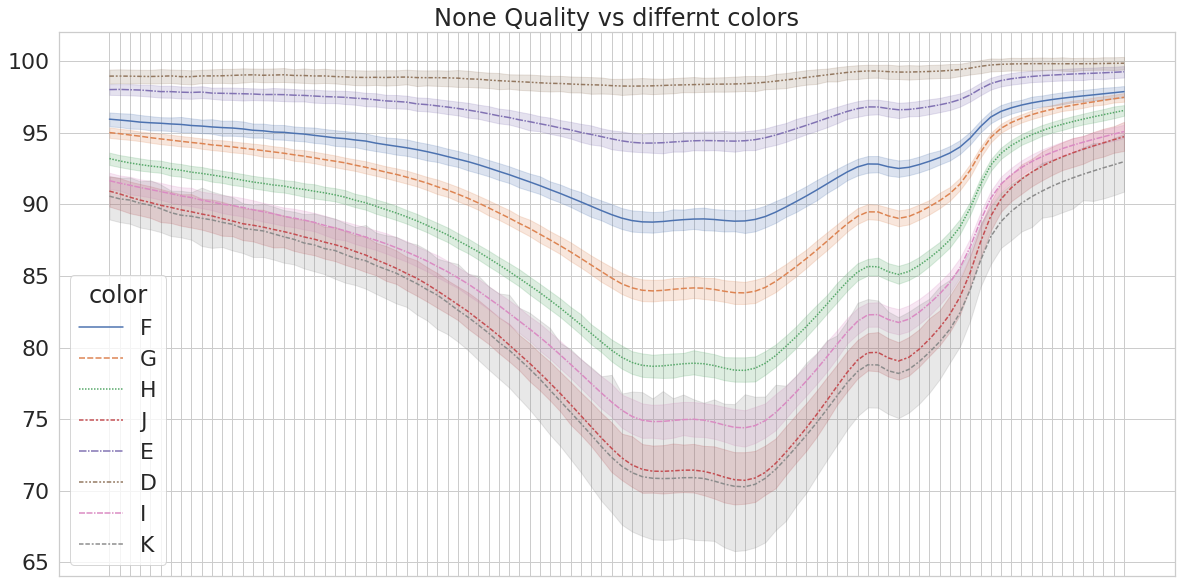

In [192]:
plt.figure(figsize=(20,10))
data1 = data_viz.set_index("color").T
g1 = sns.lineplot(data=data1)
g1.set(xticklabels=[])
g1.set_title('None Quality vs differnt colors')
plt.show()


In [ ]:
df_without_group_calb_None = df_without_calb_None.groupby(['color']).mean()
plt.figure(figsize=(20,10))
sns.set(style ="whitegrid", font_scale = 2)
sns.lineplot(data = df_without_group_calb_None, legend=False).set(title = 'Quality None', xlabel = 'color', ylabel = 'Average')
plt.show()

In [1096]:
df_without_calb_faint.set_index("color").T.head()

color,H,H,K,K,I,I,E,E,I,I,...,G,G,J,J,D,D,G,G,K,K
300.377,96.3494,78.4202,91.7176,59.2335,95.4415,78.8389,96.2673,90.6425,93.3049,72.3990,...,93.7302,68.0594,94.4283,55.7104,98.7229,100.614,95.3804,76.4065,92.6526,54.4938
301.162,96.8414,78.7433,92.3144,59.6763,95.7793,79.2367,96.8000,91.4712,93.6752,72.6632,...,93.4256,67.6487,94.1720,55.7745,98.7234,101.204,95.2496,76.6822,92.4504,54.2942
301.946,96.3242,77.9462,91.9538,59.4482,95.3213,78.8567,96.0241,90.9905,93.1314,72.3849,...,93.5363,67.9971,94.2377,56.5555,98.9904,101.356,95.2710,76.4764,92.4052,54.2583
302.731,96.3247,78.0737,92.0230,59.5057,95.0495,79.3708,96.3652,91.1371,93.3094,72.8072,...,93.6273,67.8242,93.7316,56.8432,99.4009,100.755,95.0863,76.1150,93.0562,54.4281
303.515,96.3977,77.8575,92.1563,59.1971,94.8794,78.6521,96.4518,90.4206,93.4138,72.2543,...,93.7164,67.3816,93.6857,56.9324,99.3350,100.482,95.5382,75.5548,93.1866,54.5353


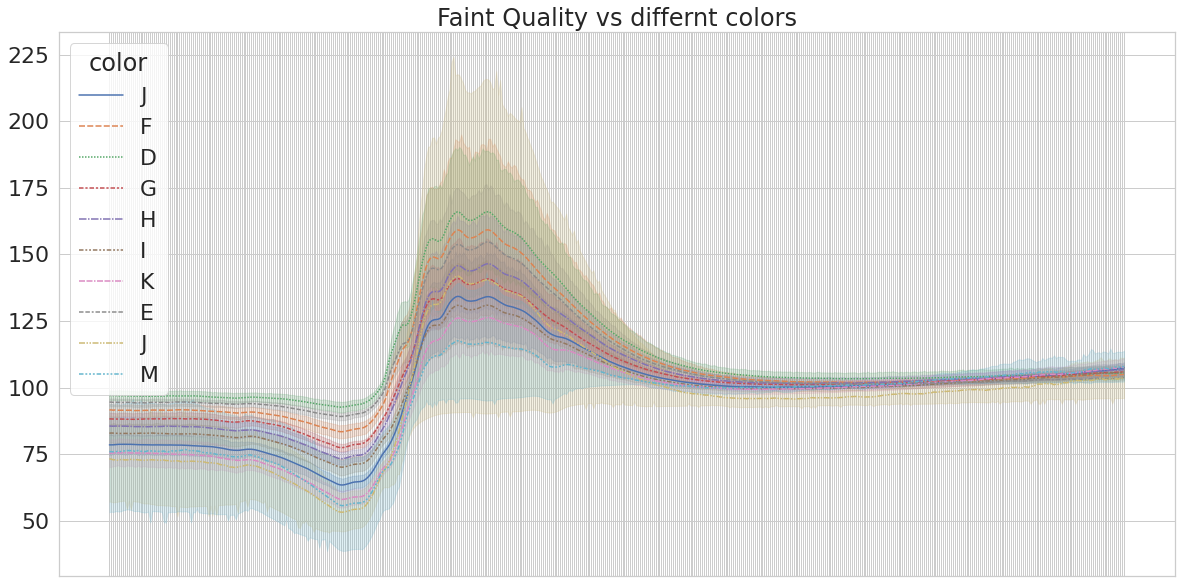

In [238]:
plt.figure(figsize=(20,10))
data1 = df_without_calb_faint.set_index("color").T
g1 = sns.lineplot(data=data1, ci=95)
g1.set(xticklabels=[])
g1.set_title('Faint Quality vs differnt colors')
plt.show()

In [ ]:
df_without_group_calb_faint = df_without_calb_faint.groupby(['color']).mean()
plt.figure(figsize=(20,10))
sns.set(style ="whitegrid", font_scale = 2)
sns.lineplot(data = df_without_group_calb_faint, legend=False).set(title = 'Quality Faint')


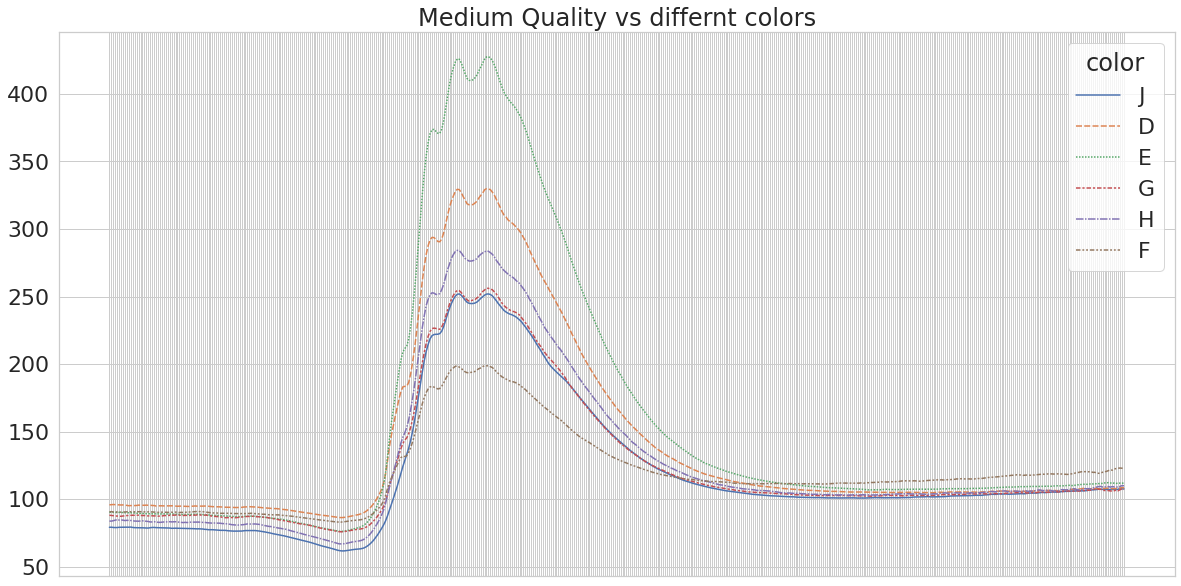

In [1081]:
plt.figure(figsize=(20,10))
data1 = df_without_calb_medium.set_index("color").T
g1 = sns.lineplot(data=data1, ci=None)
g1.set(xticklabels=[])
g1.set_title('Medium Quality vs differnt colors')
plt.show()

In [ ]:
df_without_calbgroup_medium = df_without_calb_medium.groupby(['color']).mean()
plt.figure(figsize=(20,10))
sns.lineplot(data = df_without_calbgroup_medium, legend=False).set(title = 'Quality Medium')

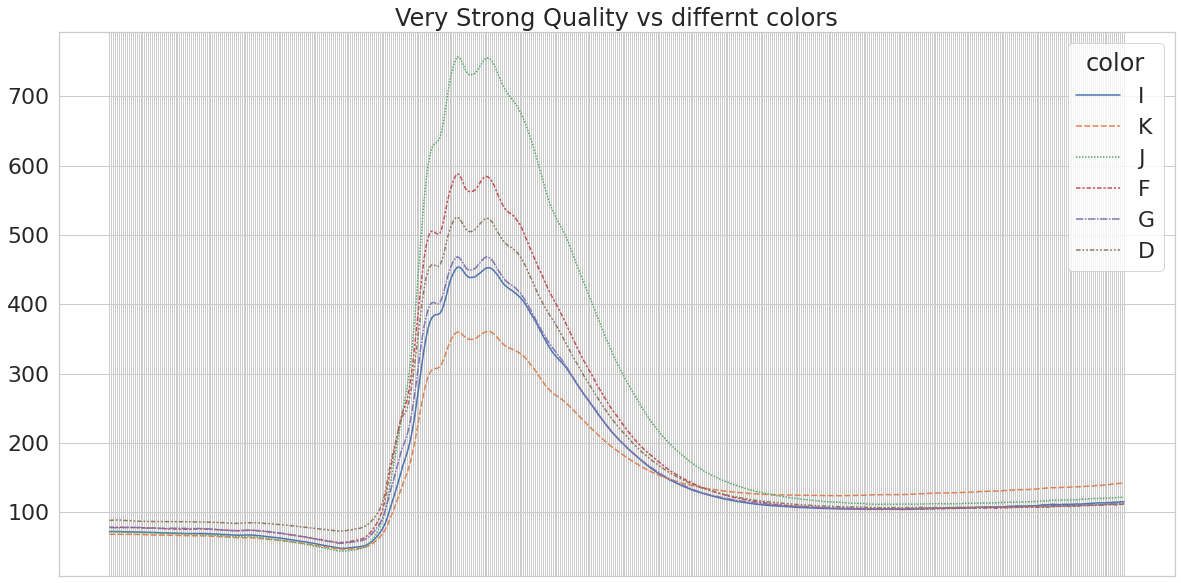

In [1083]:
plt.figure(figsize=(20,10))
data1 = df_without_calb_verystroong.set_index("color").T
g1 = sns.lineplot(data=data1, ci=None)
g1.set(xticklabels=[])
g1.set_title('Very Strong Quality vs differnt colors')
plt.show()

In [ ]:
df_without_calb_group_verystroong = df_without_calb_verystroong.groupby(['color']).mean()
plt.figure(figsize=(20,10))
sns.set(style ="whitegrid", font_scale = 2)
sns.lineplot(data = df_without_calb_group_verystroong, legend=False).set(title = 'Quality Very Strong')

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10,8))
sns.set(style ="whitegrid", font_scale = 1)
sns.scatterplot(ax = axes[0],data = df_without_calb_faintgreen.groupby('color').mean(), legend=False).set(title = 'Faint Green')
sns.scatterplot(ax = axes[1],data = df_without_calb_faint_ye.groupby('color').mean(), legend=False).set(title = 'Faint Yellow')
sns.scatterplot(ax = axes[2],data = df_without_calb_strong.groupby('color').mean(), legend=False).set(title = 'Strong')

In [269]:
df_without_calb.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/df_without_calb.xlsx', sheet_name='df_without_calb')
df_witho_calb_W.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/df_witho_calb_W.xlsx', sheet_name='df_witho_calb_W')
# df_with_F.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/processed_ver_F_2.xlsx', sheet_name='df_F')


In [837]:
# pd.cut(df[308.219], [50,60,70,80,90,100], include_lowest=True).value_counts()
pd.qcut(df_without_calb['308.219'], [.10, .5, .90] ).value_counts()
# standard scaler
# df_without_calb[308.219].value_counts(bins = [50,60,70,80,90,100])

(93.743, 100.306]    267
(69.207, 93.743]     266
Name: 308.219, dtype: int64

In [316]:
df_witho_calb_W.drop(columns=['Output','w/f'], inplace=True)

In [322]:
x = df_witho_calb_W.iloc[:,:-2]
y = df_witho_calb_W.iloc[:,-1]
print(y.value_counts(), y.shape)

G     173
D     164
F     143
E     136
I     122
H     117
J     103
K      79
M       3
J       2
Name: color, dtype: int64 (1042,)


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = 'regular', random_state= 41,  k_neighbors = 2)

In [323]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
X_train_miss, Y_train_miss = sm.fit_resample(X_train, Y_train)

In [244]:
import lightgbm as lgb

In [257]:
clf = lgb.LGBMClassifier()
grid_values = {'n_estimators':[*range(50, 200, 20)], 'max_depth':[*range(1,7,1)]}
lgb_classifier = GridSearchCV(clf, param_grid=grid_values, cv = 5)

In [349]:
Random_classifier = RandomForestClassifier()
grid_values = {'n_estimators':[*range(50, 500, 20)], 'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
random_classifier = RandomizedSearchCV(Random_classifier, param_distributions= grid_values , cv = 5)

In [266]:
boost_classfier = GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
boost_classifier = RandomizedSearchCV(boost_classfier, param_distributions= grid_values , cv = 2)

In [350]:
random_classifier.fit(X_train, Y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'n_estimators': [50, 70, 90, 110, 130,
                                                         150, 170, 190, 210,
                                                         230, 250, 270, 290,
                                                         310, 330, 350, 370,
                                                         390, 410, 430, 450,
                                                         470, 490]})

In [ ]:
pickle.dump(lgb_classifier, open('/home/pankaj_v/Documents/Data_analysis_dixit/Models/lgb_model.pkl', 'wb'))

In [44]:
pickle_model = pickle.load(open('/home/pankaj_v/Documents/Data_analysis_dixit/Models/lgb_model.pkl','rb'))

In [351]:
random_classifier.best_params_

{'n_estimators': 310,
 'min_samples_split': 0.30000000000000004,
 'min_samples_leaf': 0.1,
 'max_features': 92,
 'max_depth': 9}

In [356]:
train_preds = random_classifier.predict(Y_train)
test_preds = random_classifier.predict(X_test)

ValueError: could not convert string to float: 'I'

In [328]:
test_preds

array(['D', 'J', 'G', 'G', 'G', 'F', 'G', 'K', 'K', 'G', 'I', 'I', 'G',
       'G', 'J', 'E', 'G', 'D', 'J', 'J', 'D', 'G', 'K', 'K', 'G', 'G',
       'D', 'G', 'G', 'H', 'I', 'G', 'G', 'D', 'J', 'G', 'D', 'D', 'F',
       'G', 'K', 'I', 'K', 'F', 'K', 'J', 'E', 'G', 'H', 'E', 'F', 'J',
       'G', 'F', 'D', 'G', 'G', 'F', 'G', 'G', 'D', 'K', 'J', 'J', 'F',
       'F', 'I', 'K', 'J', 'J', 'F', 'F', 'J', 'J', 'D', 'J', 'D', 'F',
       'G', 'F', 'F', 'K', 'J', 'J', 'D', 'H', 'D', 'F', 'G', 'F', 'G',
       'E', 'G', 'F', 'I', 'G', 'J', 'H', 'J', 'D', 'J', 'F', 'I', 'D',
       'J', 'G', 'J', 'D', 'G', 'D', 'I', 'G', 'H', 'I', 'J', 'F', 'H',
       'G', 'E', 'J', 'J', 'E', 'G', 'F', 'G', 'F', 'J', 'G', 'D', 'K',
       'G', 'G', 'K', 'I', 'E', 'I', 'H', 'J', 'G', 'K', 'E', 'G', 'G',
       'I', 'F', 'D', 'H', 'D', 'H', 'H', 'I', 'G', 'E', 'E', 'J', 'K',
       'D', 'G', 'D', 'G', 'G', 'G', 'J', 'J', 'F', 'K', 'E', 'F', 'H',
       'D', 'G', 'G', 'E', 'H', 'K', 'D', 'I', 'E', 'E', 'F', 'G

In [353]:
print(classification_report(Y_test, test_preds))

              precision    recall  f1-score   support

           D       0.38      0.85      0.52        33
           E       0.00      0.00      0.00        27
           F       0.00      0.00      0.00        29
           G       0.33      0.74      0.46        35
           H       0.00      0.00      0.00        23
           I       0.29      0.08      0.13        24
           J       0.29      0.67      0.40        21
           K       0.00      0.00      0.00        16
           M       0.00      0.00      0.00         1

    accuracy                           0.33       209
   macro avg       0.14      0.26      0.17       209
weighted avg       0.18      0.33      0.21       209



In [331]:
print(accuracy_score(Y_train, train_preds)*100)

7.683073229291718e+01


In [330]:
confusion_matrix(Y_test, test_preds)

array([[22,  4,  2,  3,  0,  0,  2,  0,  0],
       [ 7,  7,  7,  6,  0,  0,  0,  0,  0],
       [ 1,  3, 12, 10,  1,  1,  0,  1,  0],
       [ 0,  2,  3, 22,  5,  0,  3,  0,  0],
       [ 1,  0,  2, 10,  4,  2,  4,  0,  0],
       [ 0,  0,  1,  3,  3,  8,  7,  2,  0],
       [ 0,  0,  0,  3,  0,  6,  7,  5,  0],
       [ 0,  0,  0,  1,  0,  2,  6,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0]])